# Generative Adversarial Networks

Inspired by https://rickwierenga.com/blog/s4tf/s4tf-gan.html and https://www.tensorflow.org/tutorials/generative/dcgan

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import tensorflow as tf

In [0]:
(x_train, _),(x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
generator = tf.keras.Sequential([
  tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(),

  tf.keras.layers.Reshape((7, 7, 256)),

  tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(),

  tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(),

  tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
])

In [0]:
discriminator = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                  input_shape=[28, 28, 1]),
  tf.keras.layers.LeakyReLU(),
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
  tf.keras.layers.LeakyReLU(),
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1),
])

In [0]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
noise_dim = 100

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([256, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(256)
train(train_dataset, 50)

Time for epoch 1 is 14.506664276123047 sec
Time for epoch 2 is 10.434206485748291 sec
Time for epoch 3 is 10.553087711334229 sec
Time for epoch 4 is 10.845302820205688 sec
Time for epoch 5 is 10.979724645614624 sec
Time for epoch 6 is 10.802932977676392 sec
Time for epoch 7 is 10.604331493377686 sec
Time for epoch 8 is 10.476471662521362 sec
Time for epoch 9 is 10.43315315246582 sec
Time for epoch 10 is 10.44762110710144 sec
Time for epoch 11 is 10.545029878616333 sec
Time for epoch 12 is 10.663335084915161 sec
Time for epoch 13 is 10.670878648757935 sec
Time for epoch 14 is 10.644028186798096 sec
Time for epoch 15 is 10.627994775772095 sec
Time for epoch 16 is 10.557690382003784 sec
Time for epoch 17 is 10.570878982543945 sec
Time for epoch 18 is 10.575762271881104 sec
Time for epoch 19 is 10.558700799942017 sec
Time for epoch 20 is 10.574848651885986 sec
Time for epoch 21 is 10.602961301803589 sec
Time for epoch 22 is 10.58772087097168 sec
Time for epoch 23 is 10.61405634880066 sec
T


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(1, 28, 28, 1)


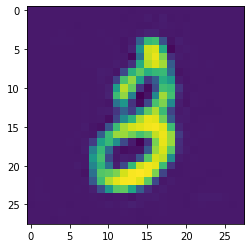

In [15]:
z = np.random.random((1, 100))
img = generator(z)
print(img.shape)
imshow(img[0, :, :, 0])

(1, 28, 28, 1)


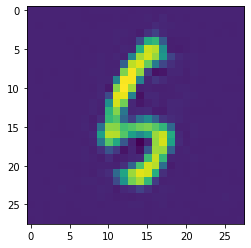

In [16]:
z = np.random.random((1, 100))
img = generator(z)
print(img.shape)
imshow(img[0, :, :, 0])

(1, 28, 28, 1)


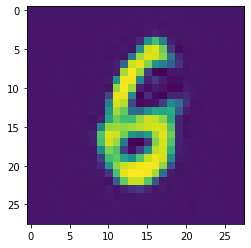

In [17]:
z = np.random.random((1, 100))
img = generator(z)
print(img.shape)
imshow(img[0, :, :, 0])